# Cell Types Project
*Replace this with the name of your project*

## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Captain Marvel**: You know, blowing up things and such.
- **Ant Man**: Cleverly sneaking into small spaces
- **Hulk**: AKA The "Muscle"

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

*Fill in your research question here*

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

### References (include links):
(1)

(2)

## Hypothesis


*Fill in your hypotheses here*

## Setup
*Are there packages that need to be imported, or datasets that need to be downloaded?*

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi


## Data Wrangling

Describe your data wrangling steps here.

In [70]:
# import human microarray expression data from Allen Brain Atlas
exp_df = pd.read_csv('Expression.csv', header=None)

# import human microarray metadata 
cols_df = pd.read_csv('Columns.csv')

# create a list of region names 
regions = cols_df['structure_name'].tolist()
regions.insert(0, 'probe_id')

# set columns to list of region names 
exp_df.columns = regions

regions

['probe_id',
 'anterior orbital gyrus',
 'frontal operculum',
 'frontal pole',
 'gyrus rectus',
 'inferior frontal gyrus, opercular part',
 'inferior frontal gyrus, orbital part',
 'inferior frontal gyrus, triangular part',
 'inferior rostral gyrus',
 'lateral orbital gyrus',
 'medial orbital gyrus',
 'middle frontal gyrus',
 'paracentral lobule, anterior part',
 'paraterminal gyrus',
 'parolfactory gyri',
 'posterior orbital gyrus',
 'precentral gyrus',
 'superior frontal gyrus',
 'superior rostral gyrus',
 'long insular gyri',
 'short insular gyri',
 'cingulate gyrus, frontal part',
 'cingulate gyrus, parietal part',
 'cingulate gyrus, retrosplenial part',
 'subcallosal cingulate gyrus',
 'dentate gyrus',
 'CA1 field',
 'CA2 field',
 'CA3 field',
 'CA4 field',
 'subiculum',
 'parahippocampal gyrus',
 'piriform cortex',
 'cuneus',
 'inferior occipital gyrus',
 'lingual gyrus',
 'occipital pole',
 'occipito-temporal gyrus',
 'superior occipital gyrus',
 'angular gyrus',
 'supramarginal

In [72]:
# initialize cache as ctc
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# get human cells 
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])

# create df for human cell types
cells_df = pd.DataFrame(human_cells)
cells_df = cells_df.set_index('id')

# get electrophysiology data
ephys = ctc.get_ephys_features()
ephys_df = pd.DataFrame(ephys)
ephys_df = ephys_df.set_index('specimen_id')

# save ephys feature columns as list
ephys_features = ephys_df.columns.tolist()

# join cell and ephys data by specimen id
ephys_df = cells_df.join(ephys_df)

# search regions in df and create list of those of interest
ephys_df['structure_area_abbrev'].unique()
regions_of_interest = ['SFG', 'IFG'] # other possible regions: 'MFG', 'FroL'

# filter df by those regions
frontal_ephys_df = ephys_df[ephys_df['structure_area_abbrev'].isin(regions_of_interest)]

#
pd.set_option('display.max_columns', None)
frontal_ephys_df.groupby(['structure_area_abbrev']).describe()



ephys_features_filtered = ephys_features[:]
ephys_features_filtered.remove('has_burst')
ephys_features_filtered.remove('has_delay')
ephys_features_filtered.remove('has_pause')


ephys_df

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,has_burst,has_delay,has_pause,id,input_resistance_mohm,latency,peak_t_long_square,peak_t_ramp,peak_t_short_square,peak_v_long_square,peak_v_ramp,peak_v_short_square,rheobase_sweep_id,rheobase_sweep_number,ri,sag,seal_gohm,slow_trough_t_long_square,slow_trough_t_ramp,slow_trough_t_short_square,slow_trough_v_long_square,slow_trough_v_ramp,slow_trough_v_short_square,tau,threshold_i_long_square,threshold_i_ramp,threshold_i_short_square,threshold_t_long_square,threshold_t_ramp,threshold_t_short_square,threshold_v_long_square,threshold_v_ramp,threshold_v_short_square,thumbnail_sweep_id,trough_t_long_square,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN,0.027846,73.678333,8.172499,0.167187,1.11848,4.105853,1.025173,-53.875004,-58.833337,-56.635418,False,False,False,525097092,232.352528,0.04170,1.11668,4.104107,1.023540,42.156254,39.218754,41.020836,525031831,40,159.531131,0.128441,1.125671,1.14262,4.134987,NaN,-53.468754,-59.510420,NaN,21.181026,90.0,77.083333,590.0,1.11614,4.103540,1.023067,-40.625004,-45.416668,-49.916670,525031835,1.11856,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN,0.001610,12.912368,-9.410000,0.735093,1.03348,NaN,1.024970,-67.125000,NaN,-67.015627,False,False,False,660970840,363.359936,0.00644,1.03206,NaN,1.023470,22.406250,NaN,25.210939,528643664,27,201.562688,0.143403,1.200419,NaN,NaN,NaN,NaN,NaN,NaN,12.614641,90.0,NaN,260.0,1.03164,NaN,1.023065,-45.250004,NaN,-46.890628,528643671,1.03394,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN,0.054784,77.400000,-50.502501,0.229195,1.22268,5.676987,1.024908,-48.812500,-51.114587,-51.818751,False,False,False,537284095,129.869152,0.07006,1.22068,5.675027,1.023444,39.406250,39.645835,36.037500,537265969,45,127.232254,0.091621,0.966619,1.36530,NaN,NaN,-52.125004,NaN,NaN,18.742713,70.0,116.374997,750.0,1.22018,5.674527,1.023036,-37.343750,-40.645836,-45.737503,537265947,1.36530,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951,0.179194,245.906667,-89.892496,0.057143,1.19876,9.888127,1.026348,-47.000000,-44.468754,-47.493754,False,False,False,519841238,66.745424,0.08662,1.19540,9.883933,1.023600,45.531250,42.072920,46.243750,519838424,38,146.874636,0.160742,1.393279,NaN,9.962780,NaN,NaN,-52.416668,NaN,50.049031,130.0,221.583328,1300.0,1.19478,9.883227,1.023048,-39.031254,-34.010418,-51.156252,519838428,1.31134,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,full,tumor,595954915,left,0.497825,0.196552,5.800000,18.352498,0.014894,1.08412,14.667307,1.023968,-63.562504,-63.135418,-62.425002,False,False,False,596063037,12

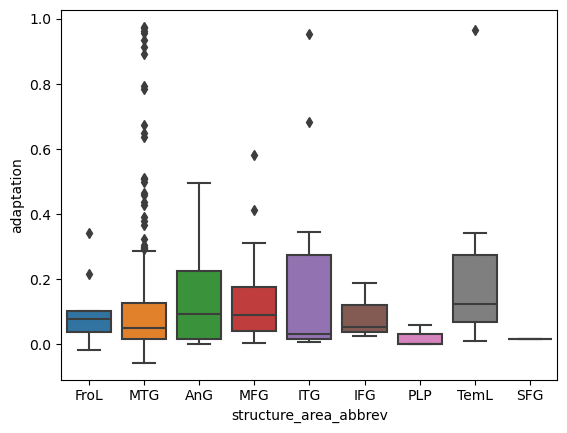

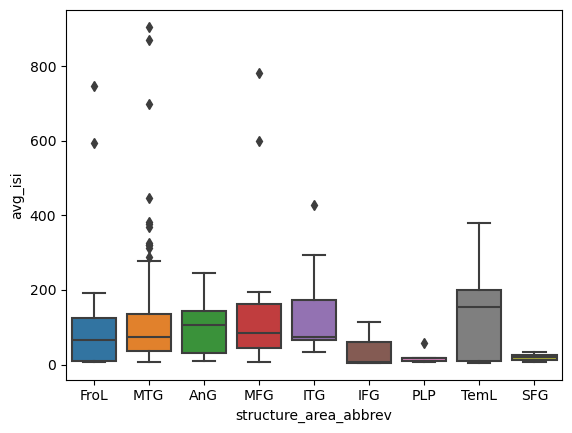

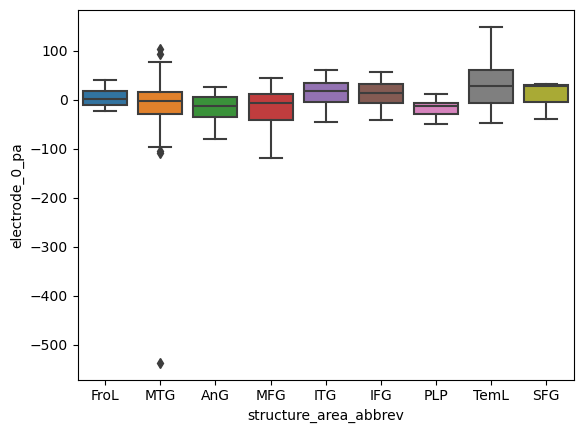

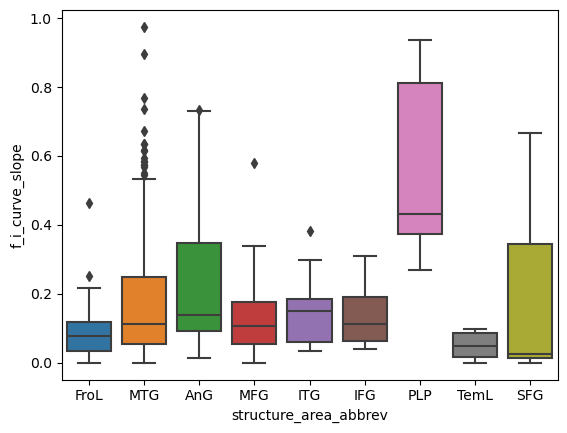

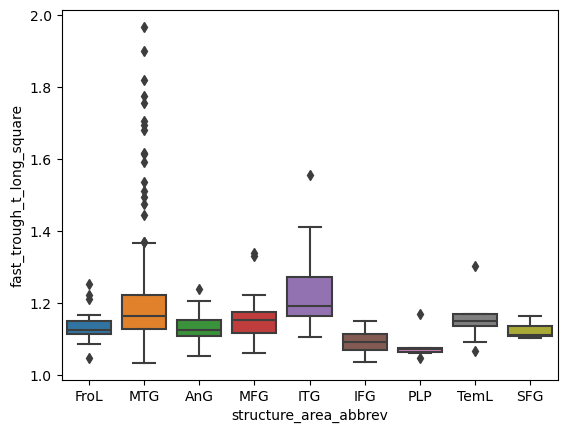

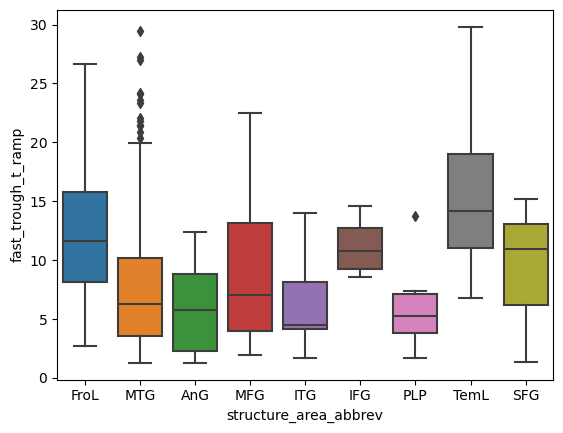

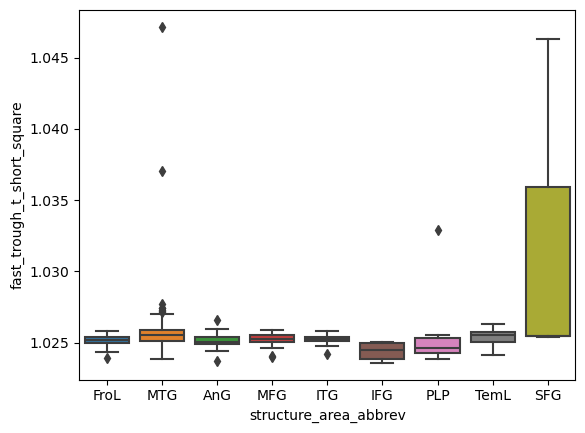

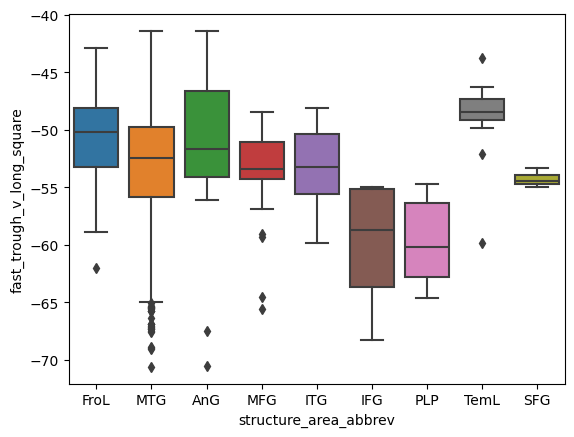

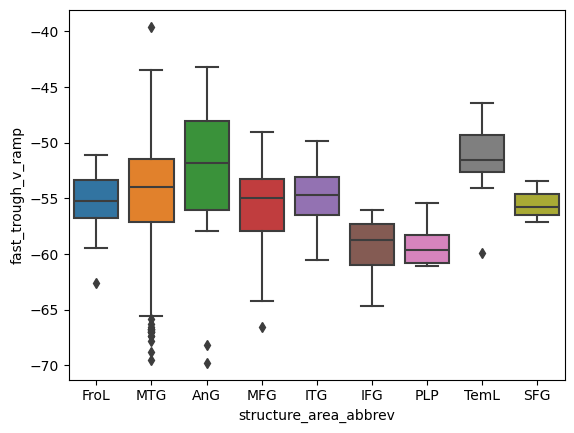

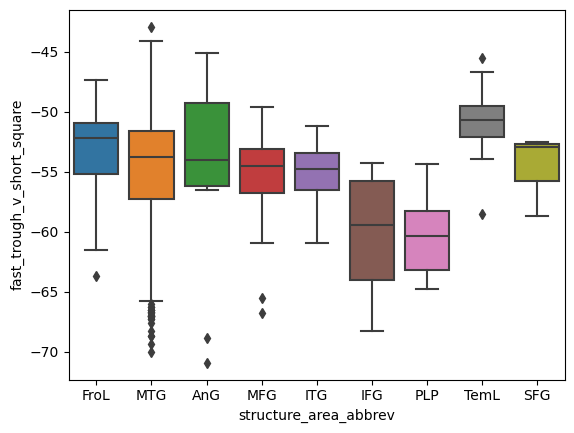

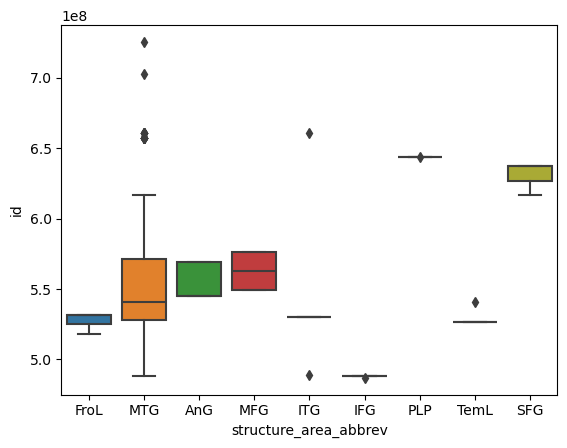

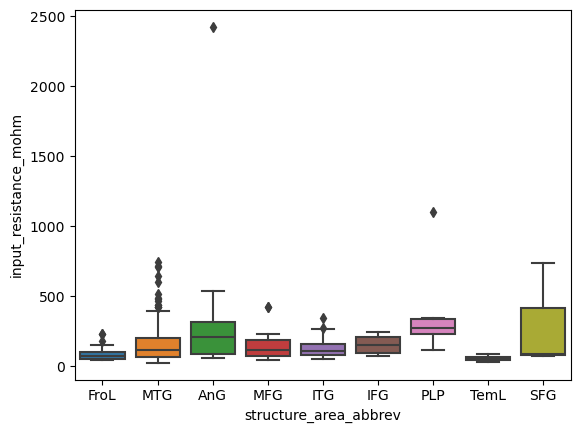

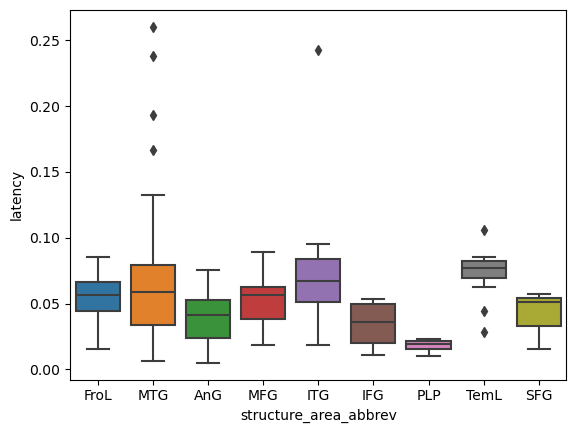

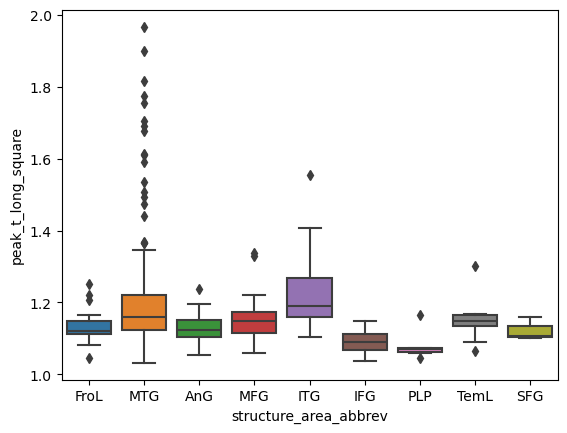

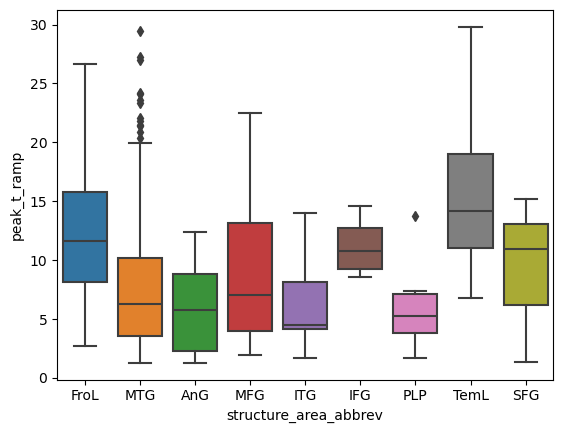

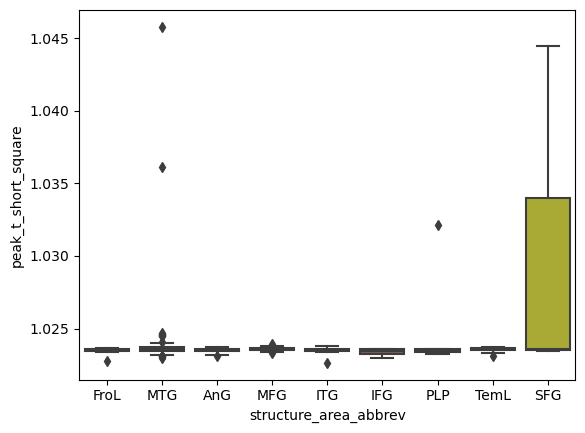

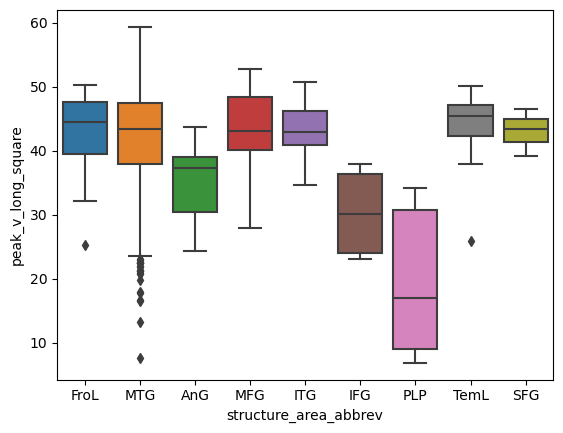

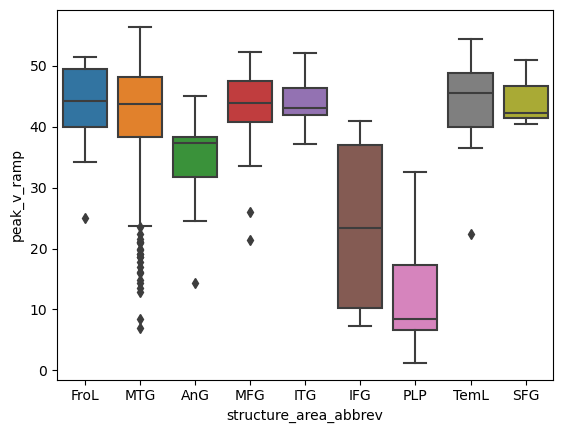

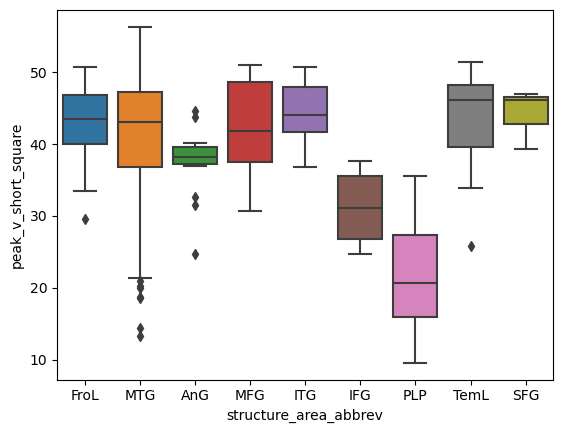

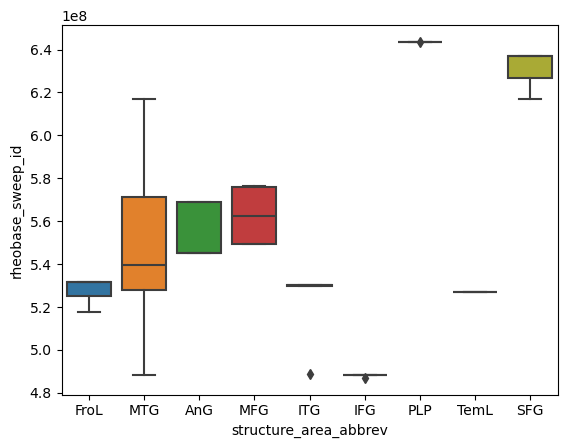

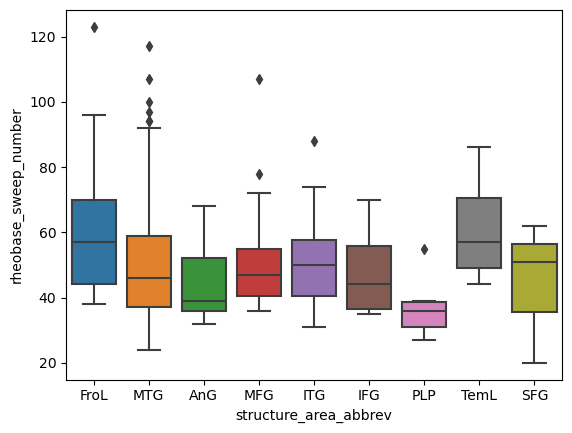

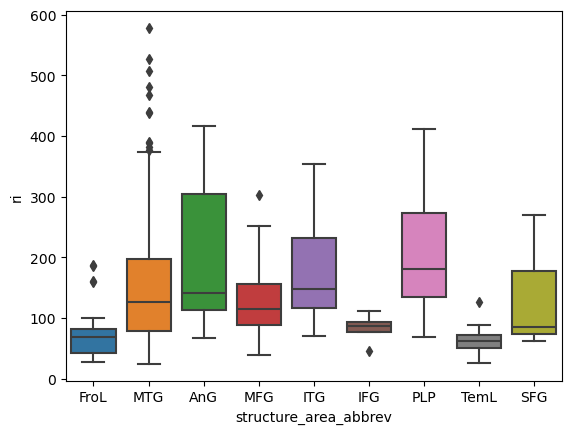

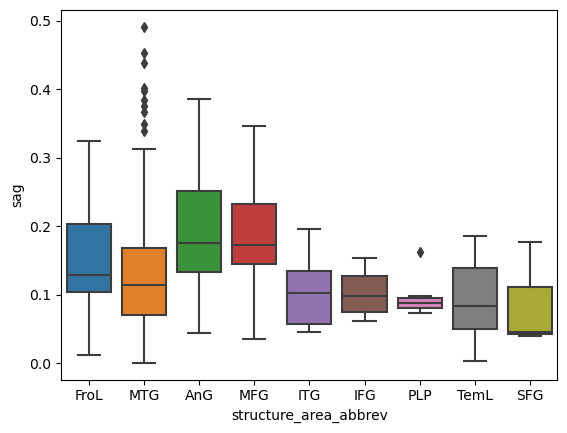

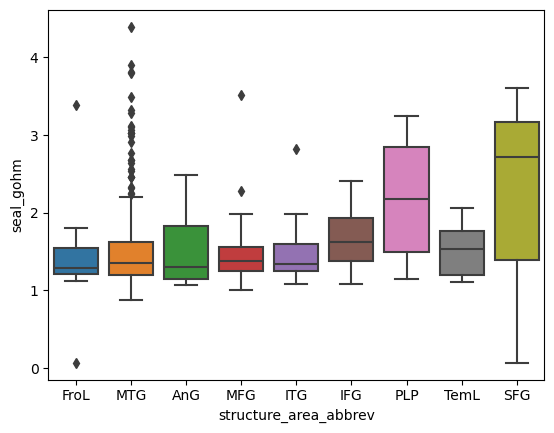

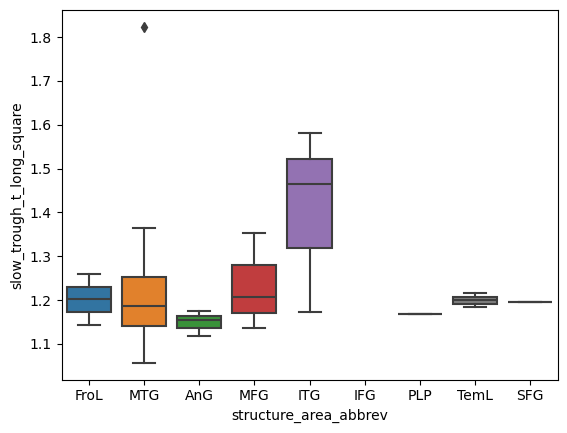

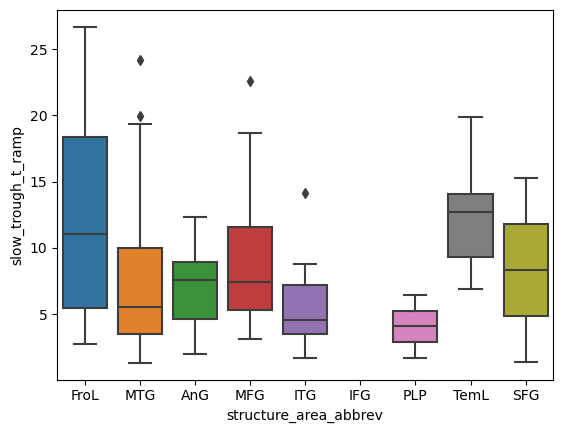

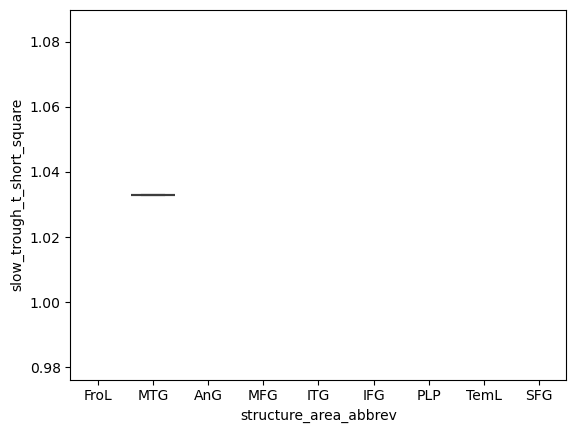

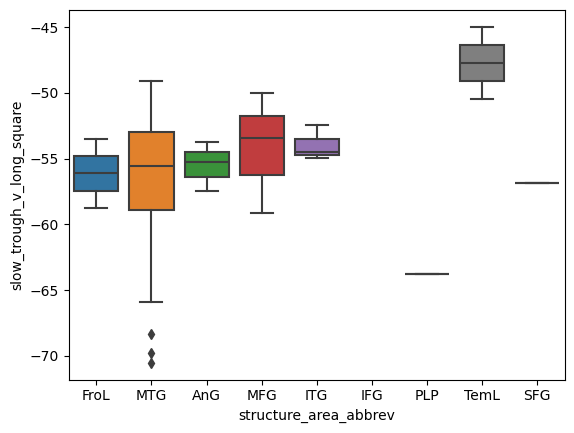

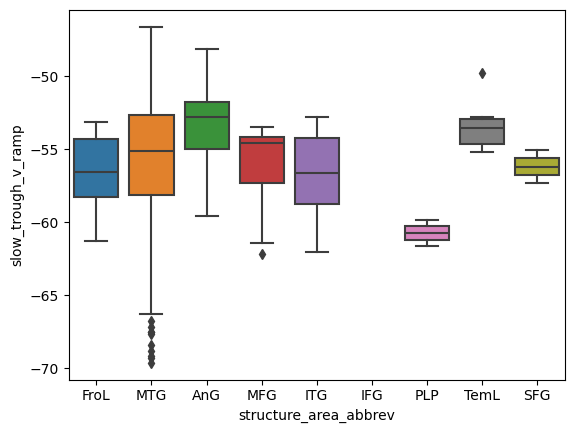

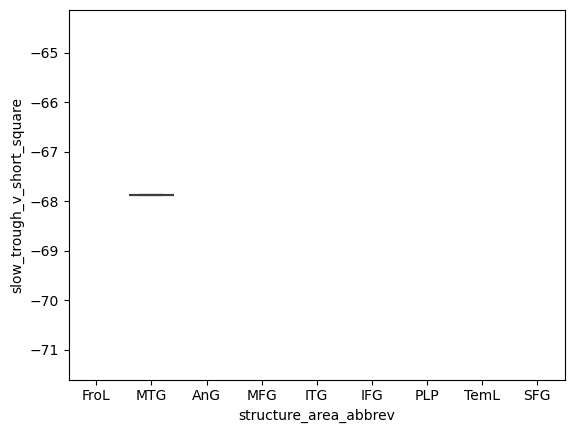

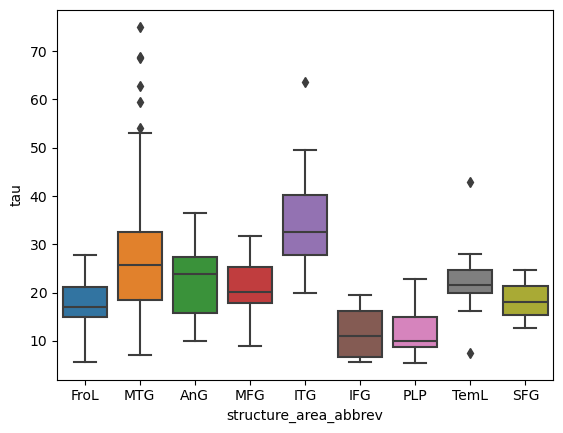

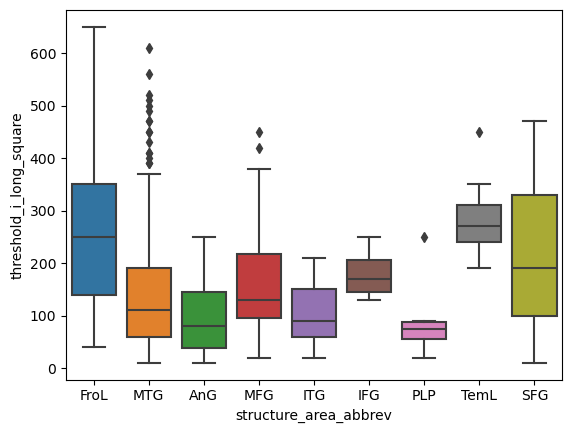

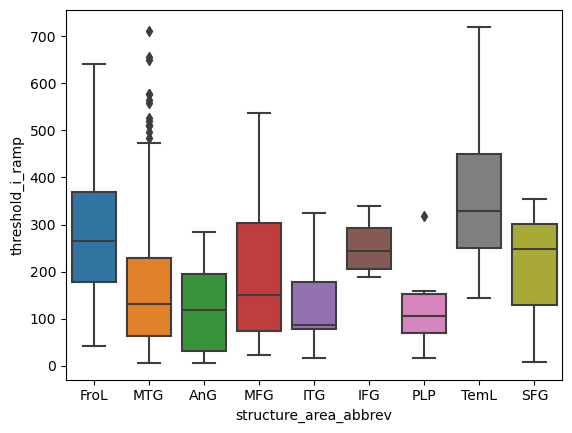

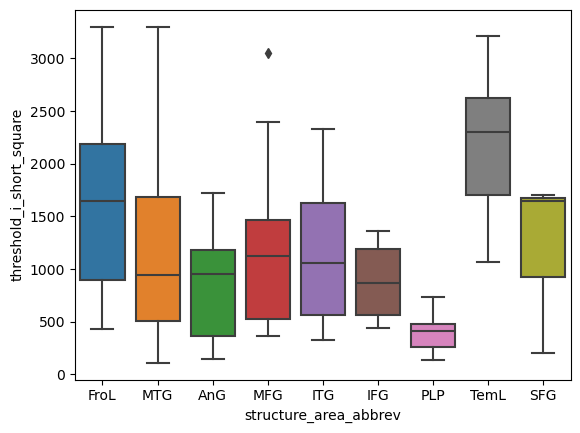

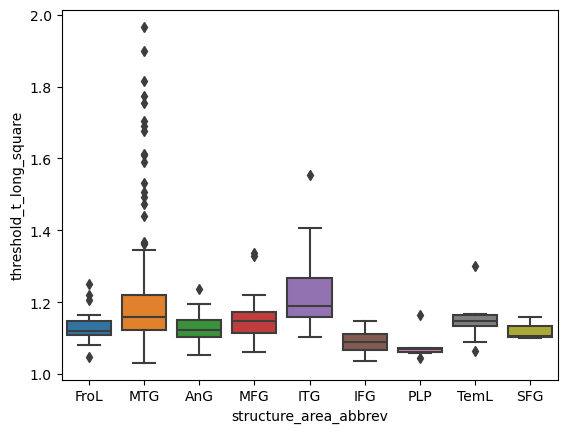

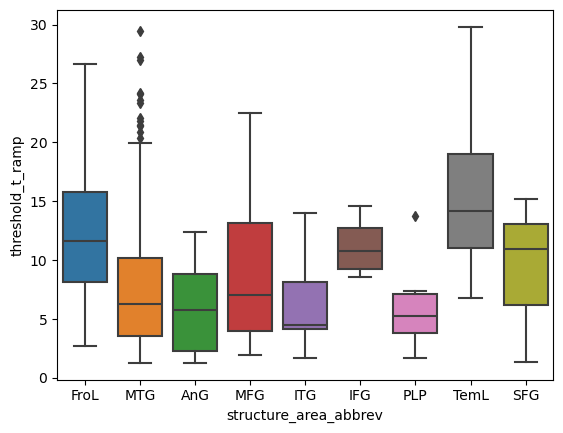

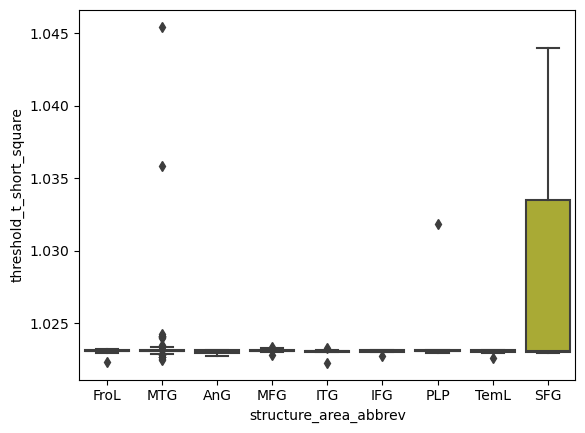

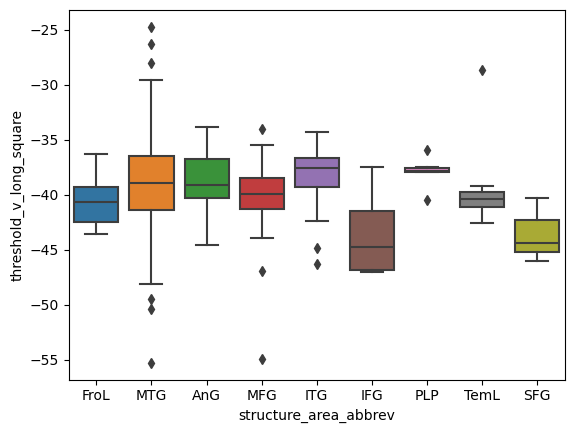

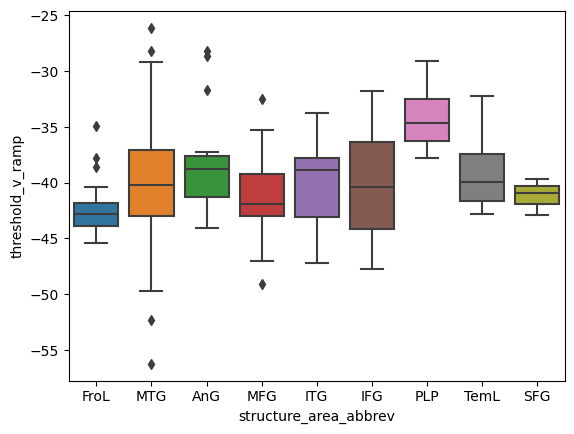

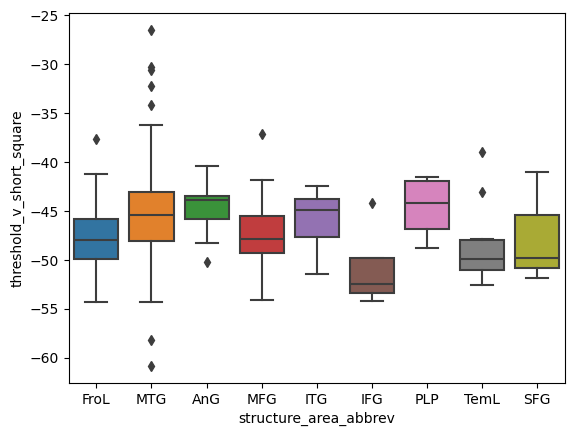

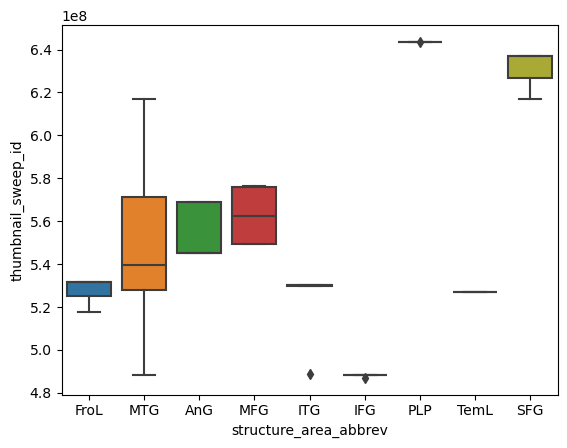

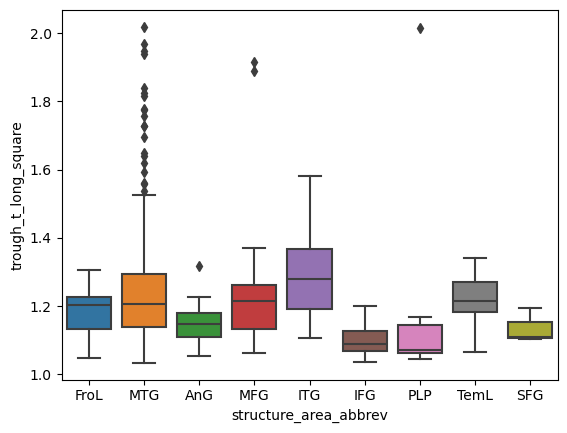

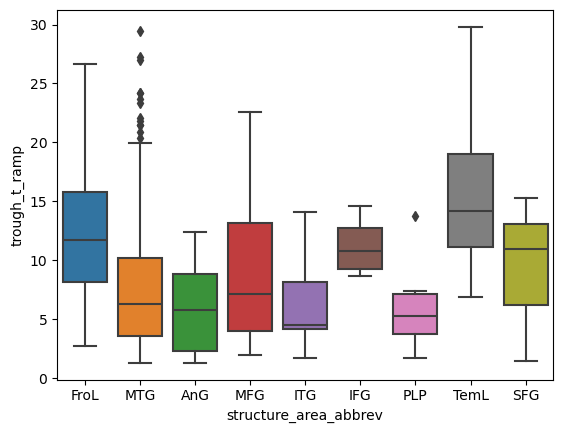

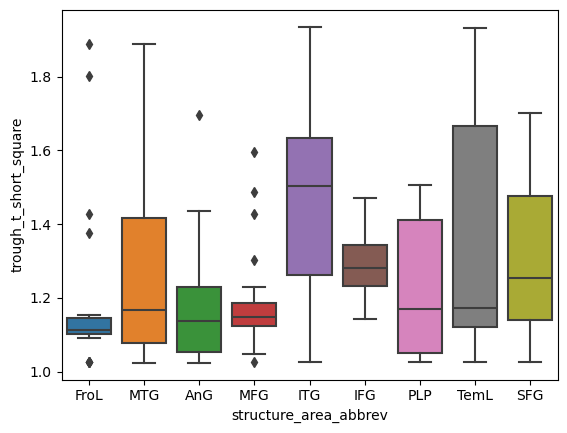

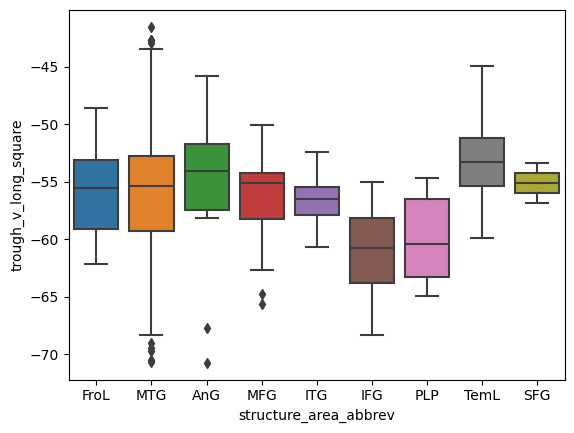

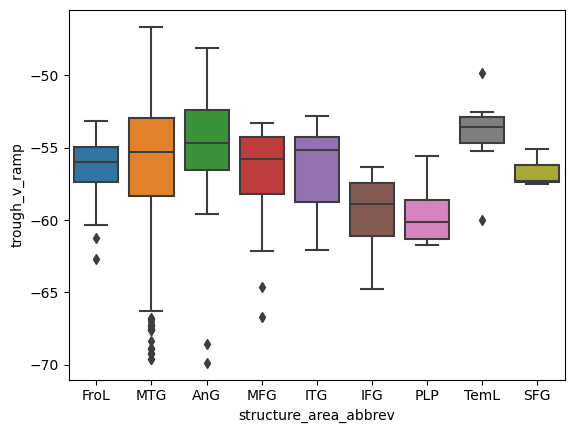

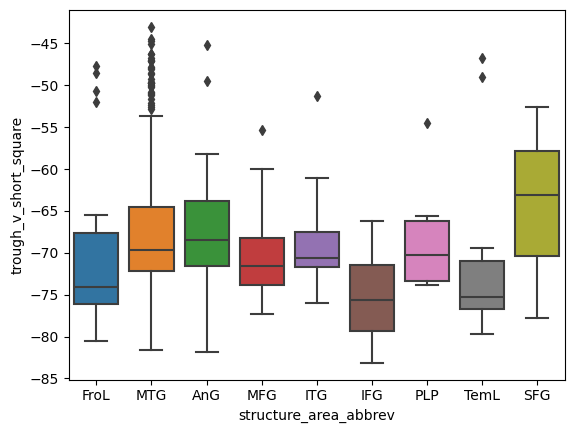

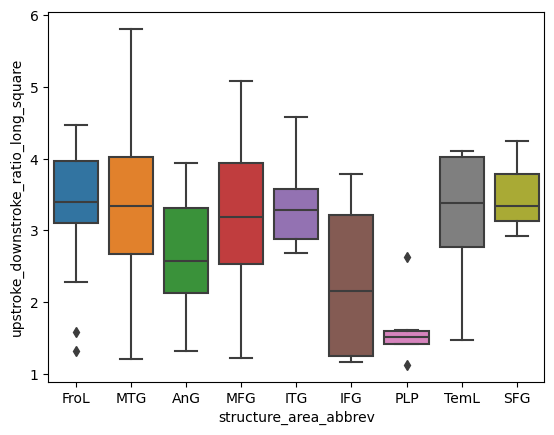

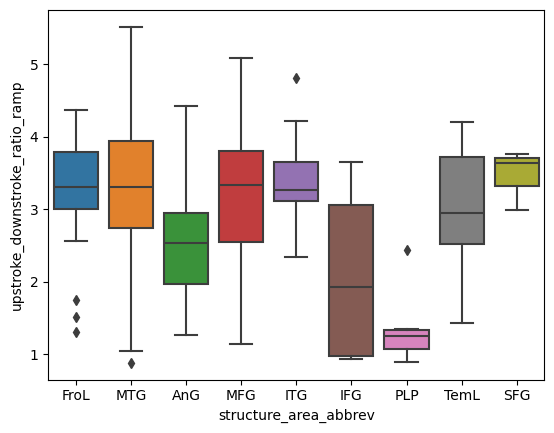

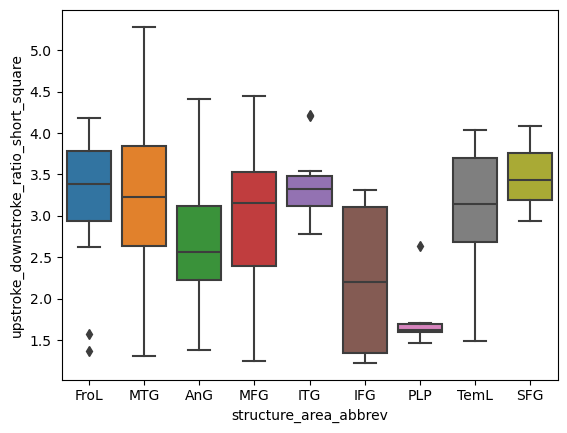

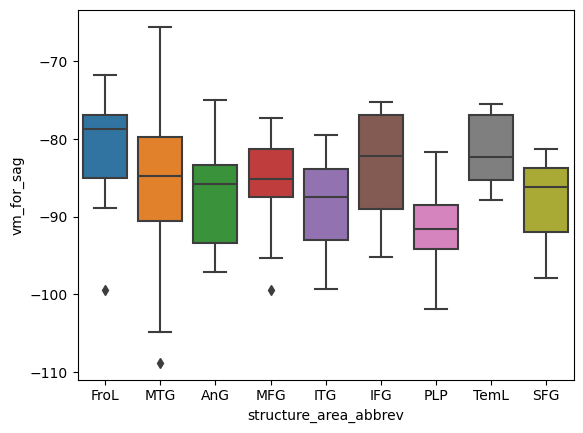

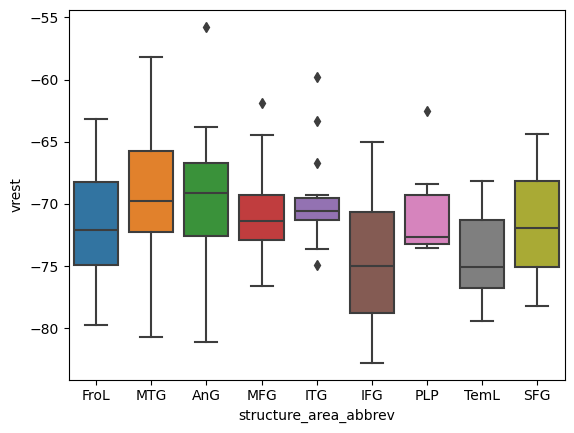

In [71]:
for feature in ephys_features_filtered:
    plt.figure()
    sns.boxplot(ephys_df,
                x = 'structure_area_abbrev',
                y = feature)
    plt.show()

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [5]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Conclusion & Discussion

*Fill in your discussion information here*